In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os 

import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel

In [4]:
os.chdir("..")

In [6]:
os.getcwd()

'/home/matias/Desktop/continuous'

In [5]:
[dt, omega] = np.load("fisher_lorentzian/params.npy")
signals = np.load("fisher_lorentzian/signals.npy")


FileNotFoundError: [Errno 2] No such file or directory: 'fisher_lorentzian/params.npy'

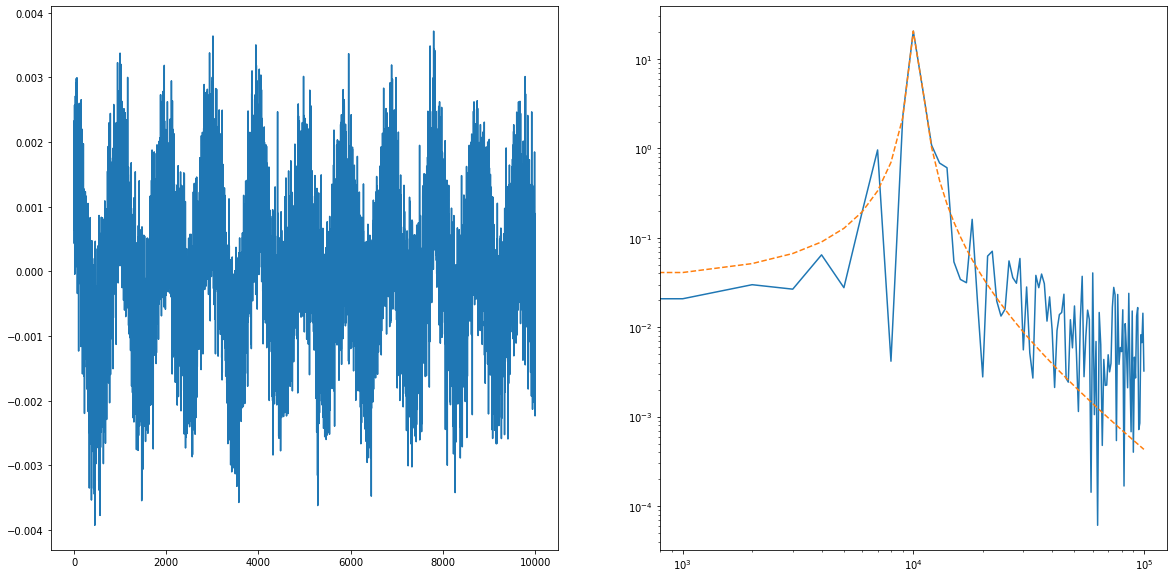

In [5]:
spectra_signal = np.abs(np.fft.fft(signals))**2
freqs_signal = np.fft.fftfreq(n = len(spectra_signal), d= dt)*(2*np.pi)

cutoff = 10*omega 
cond  = np.logical_and(freqs_signal < cutoff, freqs_signal>=0)
spectra_signal = spectra_signal[cond]
freqs_signal = freqs_signal[cond]


mod = LorentzianModel()

pars = mod.guess(spectra_signal, x=freqs_signal)
out = mod.fit(spectra_signal, pars, x=freqs_signal)

def lorentzian_fit(x, out):
    A, x0, sigma, fhwm, height = list(out.values.values())
    return (A/np.pi)*(sigma/((x-x0)**2 + sigma**2))

plt.figure(figsize=(20,10))
ax = plt.subplot(121)
plt.plot(signals)

ax = plt.subplot(122)
ax.plot(freqs_signal, spectra_signal)
ax.plot(freqs_signal, lorentzian_fit(freqs_signal, out), '--')
ax.set_xscale("log")
ax.set_yscale("log")